C:\Users\Herby\AppData\Local\Temp\ipykernel_69576\1642904685.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_filled = features.fillna(features.mean())
C:\Users\Herby\AppData\Local\Temp\ipykernel_69576\1642904685.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


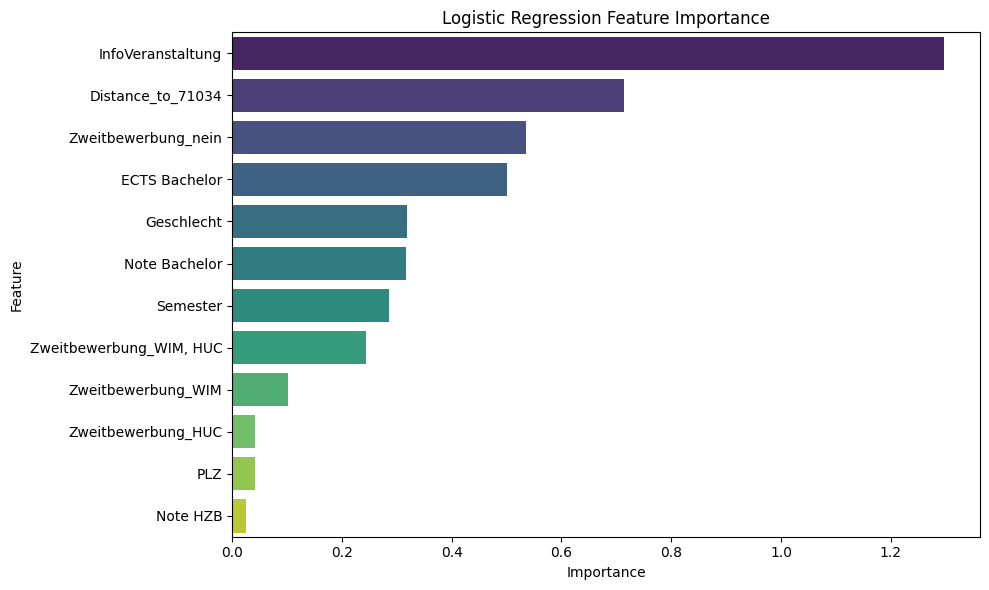

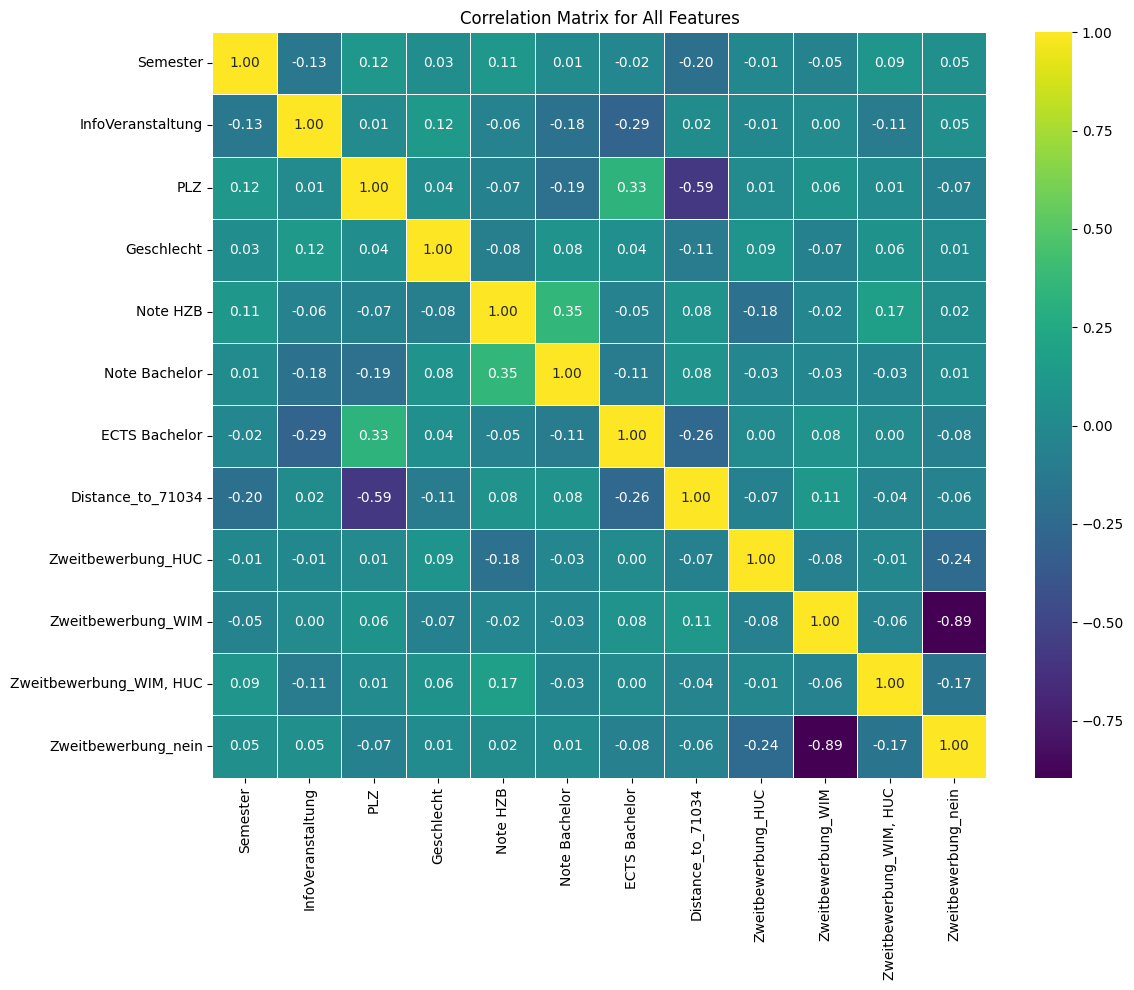

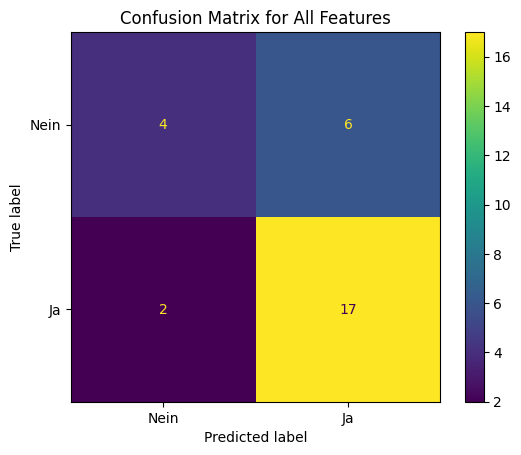

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_with_distances.xlsx'  # Make sure to have the correct path
updated_data = pd.read_excel(file_path)

# Prepare the data for logistic regression analysis
# Define the features (independent variables) and the target variable (Immatrikulation)
features = updated_data[['Semester', 'InfoVeranstaltung', 'Zweitbewerbung', 'PLZ',
                         'Geschlecht', 'Note HZB', 'Note Bachelor', 'ECTS Bachelor', 'Distance_to_71034']]

# Convert categorical features into numerical ones
features = features.copy()  # Avoid SettingWithCopyWarning
features.loc[:, 'InfoVeranstaltung'] = features['InfoVeranstaltung'].map({'ja': 1, 'nein': 0})
#features.loc[:, 'Teilnameort'] = features['Teilnameort'].map({'ja': 1, 'nein': 0})
features.loc[:, 'Geschlecht'] = features['Geschlecht'].map({'Herr': 1, 'Frau': 0})
features = pd.get_dummies(features, columns=['Zweitbewerbung'], drop_first=True)

# Define the target variable (Immatrikulation)
target = updated_data['Immatrikulation'].map({'Ja': 1, 'Nein': 0})

# Handle missing values by filling them with the mean value of each column
features_filled = features.fillna(features.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filled, target, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Extract feature importance (coefficients) from the logistic regression model
feature_importance = pd.DataFrame({
    'Feature': features_filled.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Create and visualize the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = features_filled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Features')
plt.tight_layout()
plt.show()

# Create and visualize the confusion matrix for all features
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Nein', 'Ja']).plot(cmap='viridis')
plt.title('Confusion Matrix for All Features')
plt.show()